# Social network analysis of the characters of "Harry Potter"

---

> This project aims to delve into the relationships between the characters of the popular novel series, "Harry Potter", with a social network analysis perspective.

>The dataset was obtained from https://github.com/efekarakus/potter-network

>The following code in python3 makes use of the 'networkx' module to create the network and the 'pyplot' module to draw the same.




In [0]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
from networkx.algorithms import community
import community

In [60]:
# set the nodes
with open('characters.csv', 'r') as nodecsv:   
    # read the csv               
    nodereader = csv.reader(nodecsv) 
    # the mapping dictionary contains node number to character name pairs that will be used as labels later on while drawing the graph
    mapping = {}
    nodes = []
    # get the nodes
    for n in nodereader:
        nodes.append(n[0])
        mapping[n[0]] = n[1]
nodes = nodes[1:]
# delete the first id key-value pair
del mapping['id']
print('All nodes : ', nodes)
print('Character mapping : ', mapping)

All nodes :  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64']
Character mapping :  {'0': 'Regulus Arcturus Black', '1': 'Sirius Black', '2': 'Lavender Brown', '3': 'Cho Chang', '4': 'Vincent Crabbe Sr.', '5': 'Vincent Crabbe', '6': 'Bartemius "Barty" Crouch Sr.', '7': 'Bartemius "Barty" Crouch Jr.', '8': 'Fleur Delacour', '9': 'Cedric Diggory', '10': 'Alberforth Dumbledore', '11': 'Albus Dumbledore', '12': 'Dudley Dursley', '13': 'Petunia Dursley', '14': 'Vernon Dursley', '15': 'Argus Filch', '16': 'Seamus Finnigan', '17': 'Nicolas Flamel', '18': 'Cornelius Fudge', '19': 'Goyle Sr.', '20': 'Gregory Goyle', '21': 'Hermione Granger', '22': 'Rubeus Hagrid', '23':

In [80]:
# set the edges
# open the file
with open('relations.csv', 'r') as edgecsv: 
    # read csv
    edgereader = csv.reader(edgecsv)
    # get the edges
    # edges = [tuple(e[:-1] + [1] if e[-1] == '+') for e in edgereader][1:]
    edges = []
    for e in edgereader:
        if e[-1] == '+':
            edges.append(tuple(e[:-1] + [1]))
        else:
            edges.append(tuple(e[:-1] + [0]))
    edges = edges[1:]
# printing the edge pairs to the console
print('All edges : ', edges)

All edges :  [('0', '1', 0), ('0', '25', 0), ('0', '45', 0), ('1', '0', 0), ('1', '11', 1), ('1', '21', 1), ('1', '25', 0), ('1', '31', 1), ('1', '33', 0), ('1', '34', 0), ('1', '36', 1), ('1', '37', 1), ('1', '38', 0), ('1', '39', 1), ('1', '40', 1), ('1', '41', 1), ('1', '45', 0), ('1', '47', 0), ('1', '48', 1), ('1', '50', 1), ('1', '53', 1), ('1', '54', 1), ('1', '55', 1), ('1', '58', 1), ('2', '21', 0), ('2', '28', 1), ('2', '58', 1), ('3', '9', 1), ('3', '16', 1), ('3', '21', 1), ('3', '28', 1), ('3', '39', 1), ('3', '45', 0), ('3', '58', 1), ('4', '0', 1), ('4', '5', 1), ('4', '6', 1), ('4', '25', 1), ('4', '33', 1), ('4', '38', 1), ('4', '45', 1), ('4', '47', 1), ('5', '4', 1), ('5', '49', 1), ('5', '20', 1), ('5', '21', 0), ('5', '32', 1), ('5', '39', 0), ('5', '58', 0), ('6', '4', 1), ('6', '7', 0), ('6', '23', 1), ('6', '57', 1), ('7', '6', 0), ('7', '21', 0), ('7', '28', 1), ('7', '36', 0), ('7', '37', 0), ('7', '39', 0), ('7', '45', 1), ('7', '47', 0), ('7', '38', 1), ('8'

In [57]:
# find the relationship groups
# find the edges that map positive i.e '+' relations
epos = [(u, v) for (u, v, d) in edges if d == 1]
print('Positive relationship edges : ', epos)
# find the edges that map negative i.e '-' relations
eneg = [(u, v) for (u, v, d) in edges if d == 0]
print('Negative relationship edges : ', eneg)

Positive relationship edges :  [('1', '11'), ('1', '21'), ('1', '31'), ('1', '36'), ('1', '37'), ('1', '39'), ('1', '40'), ('1', '41'), ('1', '48'), ('1', '50'), ('1', '53'), ('1', '54'), ('1', '55'), ('1', '58'), ('2', '28'), ('2', '58'), ('3', '9'), ('3', '16'), ('3', '21'), ('3', '28'), ('3', '39'), ('3', '58'), ('4', '0'), ('4', '5'), ('4', '6'), ('4', '25'), ('4', '33'), ('4', '38'), ('4', '45'), ('4', '47'), ('5', '4'), ('5', '49'), ('5', '20'), ('5', '32'), ('6', '4'), ('6', '23'), ('6', '57'), ('7', '28'), ('7', '45'), ('7', '38'), ('8', '21'), ('8', '28'), ('8', '37'), ('8', '39'), ('8', '51'), ('8', '55'), ('8', '56'), ('8', '58'), ('9', '3'), ('9', '39'), ('10', '11'), ('10', '21'), ('10', '39'), ('10', '58'), ('10', '59'), ('11', '1'), ('11', '10'), ('11', '21'), ('11', '22'), ('11', '31'), ('11', '36'), ('11', '36'), ('11', '37'), ('11', '39'), ('11', '40'), ('11', '41'), ('11', '47'), ('11', '50'), ('11', '51'), ('11', '52'), ('11', '53'), ('11', '54'), ('11', '55'), ('11

In [0]:
# construct the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

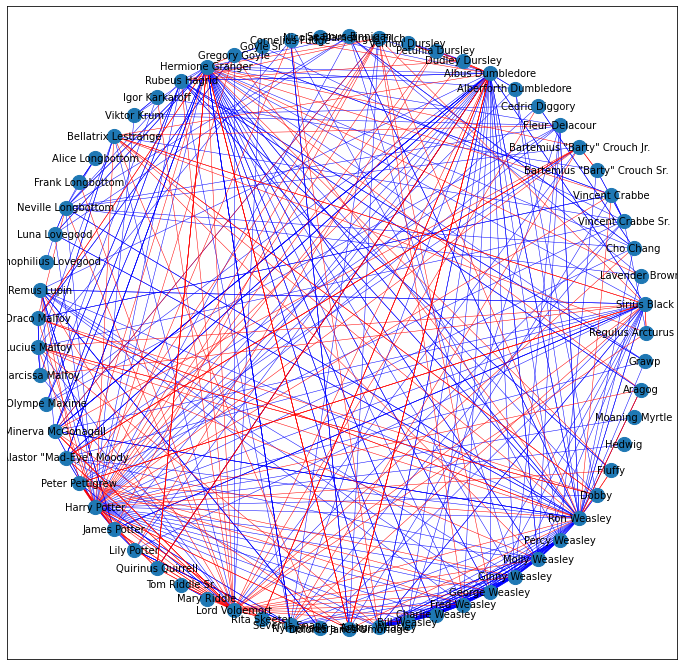

In [63]:
# draw the graph using the pyplot library
plt.figure(3,figsize=(12,12)) 
# draw the nodes
nx.draw_networkx_nodes(G, nx.circular_layout(G), node_size=200)
# draw the positive relationship edges in BLUE
nx.draw_networkx_edges(G, nx.circular_layout(G), edgelist=epos, edge_color='b', width=0.5)
# draw the negative relationship edges in RED
nx.draw_networkx_edges(G, nx.circular_layout(G), edgelist=eneg, edge_color='r', width=0.5)
# add the character names from the mapping as labels
nx.draw_networkx_labels(G, nx.circular_layout(G), labels = mapping, font_size=10, font_family='sans-serif')
# display the plot
plt.show()

Name: 
Type: Graph
Number of nodes: 65
Number of edges: 333
Average degree:  10.2462
Degree centrality:  0.75


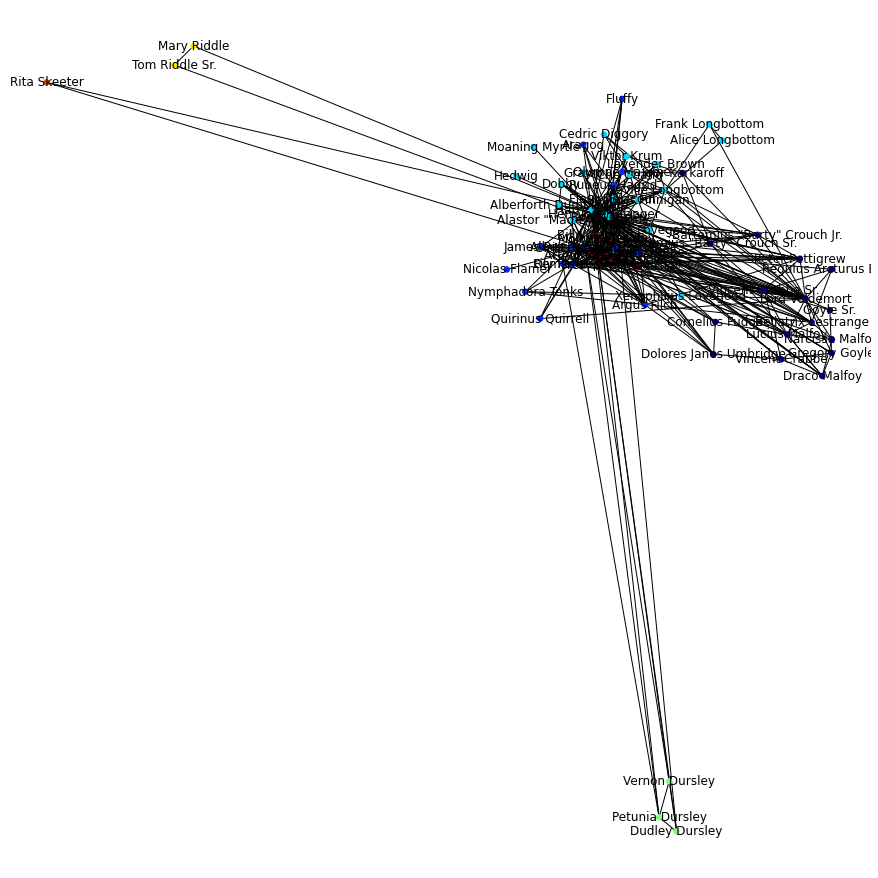

In [97]:
# information about the graph
print(nx.info(G))
print('Degree centrality: ', max(nx.degree_centrality(H).values()))

# relabel the graph for simplicity
H = nx.relabel_nodes(G, mapping)
# finding communities using the community module
part = community.best_partition(H)
values = [part.get(node) for node in H.nodes()]
plt.figure(3,figsize=(12,12)) 
nx.draw(H, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=True)
plt.show()